In [121]:
# Exploring SAT Scores and some other HighSchool Test scores/information
# Data we will be using is AP test scores, class sizes of schools, demographics, graduation results,
# -information on general directories of high schools and math tests and sat tests, school surveys containg
# -various reviews from student/parents, and school district map info
# we will attempt to gain some insights from this
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


files = ["ap_2010.csv", "class_size1011.csv", "demographics.csv", "graduation.csv", "hs_directory.csv", "math_test.csv", "sat_results.csv"]

data = {}
for f in files:
    d = pandas.read_csv("D:/StorytellingDS/{0}".format(f))
    data[f.replace(".csv", "")] = d

In [122]:
# Observing the dataset and its shape
for k,v in data.items():
    print("\n" + k + "\n")
    print(v.head())
    print(v.shape)

# The number of rows are either in the hundreds or if not in the 20k range + 
# Data sets that contains like hundreds rows are in bigger scope genre such as containing only 
# - one row of one school and corresponding features
# For 20k range rows of data, they are the ones like math or sat test results where it's a deeper scope of genre
# - where they take the rows of student data of that one school 

# Some background- NYC has 5 boroughs and schools in NYC are divided into school districts and within
# - the district contains schoools

# From exploring the features of each dataset, we can see that the data is interrelated - because
# - every data set is about schools whether its their performance, their geometric location, students test results
# We can see that most of our datasets contain in common, the DBN column 

# We will join the data together, using the DBN column 
# DBN - stands for District Borough Number which is the joining of District , Borough, and School Code
# class_size data set does not contain DBN but has CSD (District), Borough, School Code

# the 0.02d format is for 2 digit number format 1 -> 01, 2 -> 02
data["class_size1011"]["DBN"] = data["class_size1011"].apply(lambda x: "{0:02d}{1}".format(x["CSD"], x["SCHOOL CODE"]), axis=1)
# column dbn for hs_directory is small cased, so we add another large case to match others'
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]





ap_2010

      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  
(258, 5)

class_size1011

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Cl

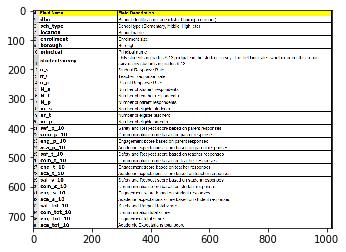

(1702, 23)

In [123]:
# So far, we have not include the survey and the disctrict map; these information are least related to 
# - the rest of data set and are considered to be additional data that could make our data more interesting

# Because survey data needs to formated (does not come as csv) to be joinable with others
survey1 = pandas.read_csv("D:/StorytellingDS/survey/masterfile11_gened_final.txt", delimiter="\t", encoding='windows-1252')
survey2 = pandas.read_csv("D:/StorytellingDS/survey/masterfile11_d75_final.txt", delimiter="\t", encoding='windows-1252')
# Because 'd75' column is binary value that tells whether the observatoins belongs to district 75,
# - we will change it to Boolean
survey1["d75"] = False
survey2["d75"] = True
# Concatinate data set along rows
# note that there are some alike columns because survey columns != survey1 columns + survey 2 columns
survey = pandas.concat([survey1, survey2], axis=0)
# since we need only dbn to join with others, we will remove the extras such as school name and stuff
# - only include the dbn and the responses
# just to show survey dict that which variables are important 
img0=mpimg.imread('D:/StorytellingDS/survey/surveydict.png')
imgplot = plt.imshow(img0)
plt.show()

survey["DBN"] = survey["dbn"]
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11",]
survey = survey.loc[:,survey_fields]
data["survey"] = survey
survey.shape

In [124]:
# Before joining the datasets we have to condense some datasets because some datasets contain
# -more than one row per highschool while some only one row per highschool
# class_size1011 have repeated school names because there are many values for 'grade' and 'program type'
# extract out only: GRADE - '9-12'  (because we only want high schoolers) and Program Type - 'GEN ED'
class_size = data["class_size1011"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
# Here, finding the mean is probably the best way to condense data 
class_size = class_size.groupby("DBN").agg(np.mean)
# reset index to make 'DBN' to a column
class_size.reset_index(inplace=True)
data["class_size1011"] = class_size

# Condensing demographics
# data set contains many years for same school, so we will choose most recent year
demographics = data["demographics"]
demographics = demographics[demographics["schoolyear"] == 20112012]
data["demographics"] = demographics

# Condensing math test results
# Grade 8 because its the most recent one 
data["math_test"] = data["math_test"][data["math_test"]["Year"] == 2011]
data["math_test"] = data["math_test"][data["math_test"]["Grade"] == '8']

# Condensing graduation
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

data['demographics']

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9
42,01M064,PS 064 ROBERT SIMON,20112012,NaN,76.9,324,27,54,50,42,...,76,23.5,193,59.6,24,7.4,184.0,56.8,140.0,43.2
49,01M110,PS 110 FLORENCE NIGHTINGALE,20112012,NaN,52.5,440,34,67,75,65,...,58,13.2,194,44.1,124,28.2,219.0,49.8,221.0,50.2
56,01M134,PS 134 HENRIETTA SZOLD,20112012,NaN,84.1,369,36,67,57,55,...,74,20.1,181,49.1,8,2.2,177.0,48.0,192.0,52.0
63,01M137,PS 137 JOHN L BERNSTEIN,20112012,NaN,82.2,230,18,43,43,39,...,57,24.8,123,53.5,7,3.0,111.0,48.3,119.0,51.7
70,01M140,PS 140 NATHAN STRAUS,20112012,NaN,82.1,407,16,37,35,39,...,66,16.2,317,77.9,7,1.7,216.0,53.1,191.0,46.9


In [125]:
# Finding total sat score
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
# because its a string we convert it to number to enable computation
for c in cols:
    data["sat_results"][c] = data["sat_results"][c].convert_objects(convert_numeric=True)

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

# Parsing out latitude and longitude into easy formats and convert it a number for computation 
# Replacing parentheses since there are brackets 
data["hs_directory"]['lat'] = data["hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[0])
data["hs_directory"]['lon'] = data["hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[1])

for c in ['lat', 'lon']:
    data["hs_directory"][c] = data["hs_directory"][c].convert_objects(convert_numeric=True)
    
for k,v in data.items():
    print("\n" + k + "\n")
    print(v.head())
    print(v.shape)


ap_2010

      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  
(258, 5)

class_size1011

      DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292    1                            88.0000            4.000000   
1  01M332    1                            46.0000      

C:\Users\GE62\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """
C:\Users\GE62\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [133]:
for k,v in data.items():
    print(k)
    print(len(data[k]["DBN"].unique()))

ap_2010
257
class_size1011
583
demographics
1509
graduation
405
hs_directory
435
math_test
499
sat_results
478
survey
1702


In [128]:
# Note: some of the datasets are missing HighSchools from the sat_results dataset
# have to merge those datasets using outer method because it covers all data

flat_data_names = ['math_test',
 'class_size1011',
 'demographics',
 'graduation',
 'hs_directory',
 'ap_2010',
 'sat_results',
 'survey']
flat_data = [data[k] for k in flat_data_names]
full = flat_data[0]
# idea here to keep joining intersections but because we're focused on sat results (our main goal)
# we will use outer on sat results as well as additional interesting data like ap scores
for i, f in enumerate(flat_data[1:]):
    name = flat_data_names[i+1]
    print(name)
    print(len(f["DBN"]) - len(f["DBN"].unique()))
    join_type = "inner"
    if name in ["sat_results", "ap_2010", "graduation"]:
        join_type = "outer"
    if name not in ["math_test"]:
        full = full.merge(f, on="DBN", how=join_type)

# full.shape


class_size1011
0
demographics
0
graduation
0
hs_directory
0
ap_2010
1
sat_results
0
survey
0


In [135]:
# Convert strings to numbers and fill any missing values with 0
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    full[col] = full[col].convert_objects(convert_numeric=True)

full[cols] = full[cols].fillna(value=0)

# Extract only school district for plotting maps in the future and fill the rest of na's with the mean
full["school_dist"] = full["DBN"].apply(lambda x: x[:2])
full = full.fillna(full.mean())

# Comparing correlations with sat_score 0 to 1
full.corr()['sat_score']
# total enrollment/cohort has a correlation with sat scores which kinda hints that the more student there is
# -the higher the score
# ell_percent has a negative correlation
# differences in races demonstrate different correlations (white_per,black_per,etc.) which means there is inequality
# amount of female has a positive corr. and amount of male has negative corr. 
# some of the scores given by surveys have a strong correlation such as safety scores aca scores





C:\Users\GE62\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


Year                                         NaN
Number Tested                           0.076711
CSD                                     0.081876
NUMBER OF STUDENTS / SEATS FILLED       0.049077
NUMBER OF SECTIONS                      0.043024
AVERAGE CLASS SIZE                      0.042311
SIZE OF SMALLEST CLASS                  0.007247
SIZE OF LARGEST CLASS                   0.052245
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
frl_percent                            -0.192666
total_enrollment                        0.143359
ell_num                                -0.135496
ell_percent                            -0.151085
sped_num                               -0.086005
sped_percent                           -0.177780
asian_num                               0.194211
asian_per                               0.154347
black_num                               0.018965
black_per                              -0.075374
hispanic_num        

In [137]:
district_data = full.groupby("school_dist").agg(np.mean)
district_data.reset_index(inplace=True)
district_data["school_dist"] = district_data["school_dist"].apply(lambda x: str(int(x)))


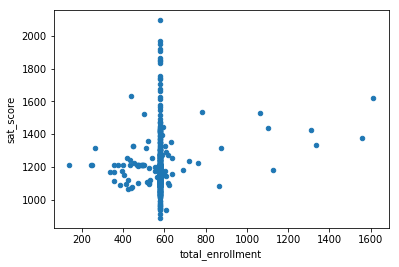

In [141]:
# Exploring enrollment and sat score
%matplotlib inline

full.plot.scatter(x='total_enrollment', y='sat_score')
# theres a cluster around 600 students enrolled and the rest are quite weak correlations
# we can examine the the schools with low enrollment and low scores
full[(full["total_enrollment"] < 1000) & (full["sat_score"] < 1000)]["School Name"]



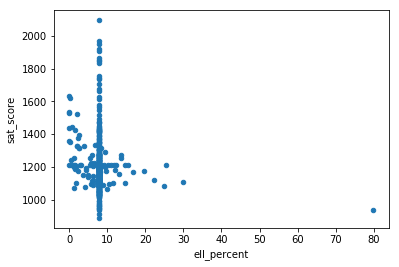

In [142]:
# Exploring ell_percent and sat score
# ell_percent refers to percent of students who are english learners 
full.plot.scatter(x='ell_percent', y='sat_score')
# this plot shows quite a strong trend we have lots of low english learners with high sats
# this says that those who do not take english are likely to score higher 

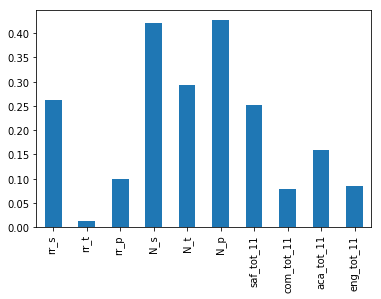

In [144]:
# Seeing correlation of survey data
full.corr()["sat_score"][["rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_tot_11", "com_tot_11", "aca_tot_11", "eng_tot_11"]].plot.bar()
# none of the other factors, like engagement, communication, and academic expectations, correlated with SAT scores. This may indicate 
# -that NYC is asking the wrong questions in surveys, or thinking about the wrong factors

# N_s and N_p is amount of students and parents who took the surveyed which is like total_enrollment

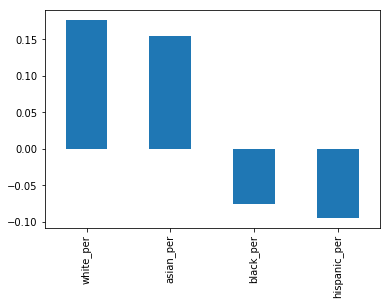

In [145]:
# Race and sat scores
full.corr()["sat_score"][["white_per", "asian_per", "black_per", "hispanic_per"]].plot.bar()
# white and asians are pretty strong here
# the low correlation of hispanics can come from the fact that they can English learners 


109                  STUYVESANT HIGH SCHOOL
128    FIORELLO H. LAGUARDIA HIGH SCHOOL OF
189            BRONX HIGH SCHOOL OF SCIENCE
218          BROOKLYN TECHNICAL HIGH SCHOOL
297             TOWNSEND HARRIS HIGH SCHOOL
Name: School Name, dtype: object

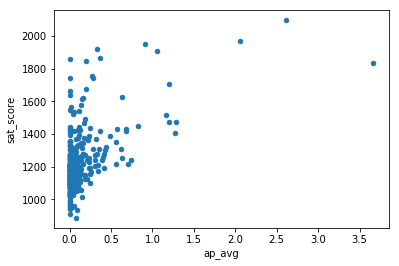

In [147]:
# AP scores and sat score
full["ap_avg"] = full["AP Test Takers "] / full["total_enrollment"]

full.plot.scatter(x='ap_avg', y='sat_score')

# makes sense for the high correlation because people who do well on AP's are well off to score 
# -decently on SATs
# we can extract out schools with high AP's and high SATs
full[(full["ap_avg"] > 1) & (full["sat_score"] > 1600)]["School Name"]


In [148]:
import folium

ModuleNotFoundError: No module named 'branca'